<a href="https://colab.research.google.com/github/bryanf98/IA_2020B/blob/main/DNN_ChangeJob/Flores_ANN_Balanceo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escuela Politécnica Nacional


---


Inteligencia Artificial

Alumno: Bryan Flores Sarango

Fecha:27-01-2021


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import keras
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

**Cargamos el csv con los datos de entrenamiento:**

In [15]:
uploaded = files.upload()

Saving aug_train.csv to aug_train (1).csv


**Leemos el csv de entrenamiento:**

In [88]:
import pandas as pd
import io

data = pd.read_csv('aug_train.csv')


**Campos categoricos con Encode:**

In [89]:
data2=data
from sklearn.preprocessing import LabelEncoder 

caracteristicas=[x for x in data2.columns if data2[x].dtype=="object"]

le=LabelEncoder()

for col in caracteristicas:
    if col in data2.columns:
        i = data2.columns.get_loc(col)
        data2.iloc[:,i] = data2.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

X=data2.iloc[:,:-2]
y=data2.iloc[:,-1].values
contadorNC=0
contadorC=0

for i in range(len(y)):
  if(y[i]==0):
    contadorNC=contadorNC+1
  elif(y[i]==1):
    contadorC=contadorC+1

print("No quieren cambiar de trabajo:  ",contadorNC)
print("Quieren cambiar de trabajo:   ",contadorC)


No quieren cambiar de trabajo:   14381
Quieren cambiar de trabajo:    4777


In [90]:
features =["enrollee_id","city","city_development_index","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job","training_hours"]
target = 'target'

**Balanceo de datos:**

In [91]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
#Métodos de sobremuestreo
#SMOTE
smote = SMOTE()

In [92]:
from sklearn.model_selection import train_test_split
Y = data2['target']
X = data2.drop(columns=['target'])
X,Y = smote.fit_resample(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Preparamos el modelo, secuencial de 4 capas**

In [95]:

model = Sequential() 
model.add(Dense(10, input_dim=13, kernel_initializer='random_uniform' , activation= "selu" ))
model.add(Dense(8, kernel_initializer='random_uniform' , activation= "selu" ))  
model.add(Dense(6, kernel_initializer='random_uniform' , activation= "relu" )) 
model.add(Dense(1, kernel_initializer='random_uniform' , activation= "sigmoid" )) 
     # Compilamos el  modelo
model.compile(loss= "mean_squared_error" , optimizer= "adam" , metrics=["binary_accuracy"]) 
     # Ajustamos el modelo 

history = model.fit(X_train, y_train, epochs=450, batch_size=20, verbose=0)  
     # evaluate the model 

     
 #Evaluamos    
scores = model.evaluate(X_train, y_train)

#impresión de resultados
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(X_train).round())

764/764 [==============================] - 1s 826us/step - loss: 0.2043 - binary_accuracy: 0.7003

binary_accuracy: 70.03%
[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


**Graficamos la perdida en el entrenamiento:**

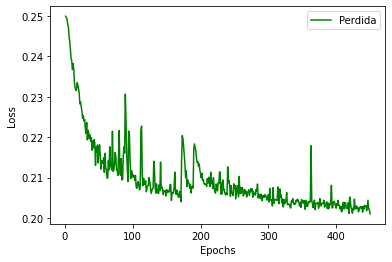

In [96]:
epochs=range(1,451)
perdida = history.history["loss"]
plt.plot(epochs,perdida,'g',label='Perdida')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**Graficamos el accuracy:**

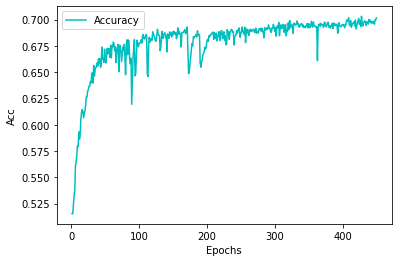

In [97]:
acc=history.history["binary_accuracy"]
plt.plot(epochs,acc,'c',label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

**Guardamos el modelo y lo descargamos:**

In [98]:
model.save('modeloGuardadoSequential.h5')
print('Modelo Guardado')

Modelo Guardado


In [99]:
from google.colab import files
files.download("modeloGuardadoSequential.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>